aqui cargamos los datos raw y los entendemos, visualizamos, mostramos estadisticas descriptivas, verificamos el balance de la variable objetivo, etc.

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import nltk     
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import graphviz 
from sklearn import tree
from sklearn import metrics
from wordcloud import WordCloud
import xgboost as xgb



In [10]:


file_path = r"C:\Users\lunai\OneDrive\Escritorio\capstone1\capstone\data\raw\SMSSpamCollection"

# Utiliza \t como delimitador
sms = pd.read_csv(file_path, sep="\t", header=None, names=["Label", "SMS"])
sms.head()


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
sms.shape

(5572, 2)

In [17]:

sms.groupby('Label').describe()

SMS                                                               
      count unique                                                top freq
Label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [19]:
#check for missing values
sms.isnull().sum()

Label    0
SMS      0
dtype: int64

In [18]:
#check for duplicates
sms[sms.duplicated(keep=False)]



,Label,SMS
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [20]:
#percentage of spam and ham
sms['Label'].value_counts(normalize=True) * 100


Label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

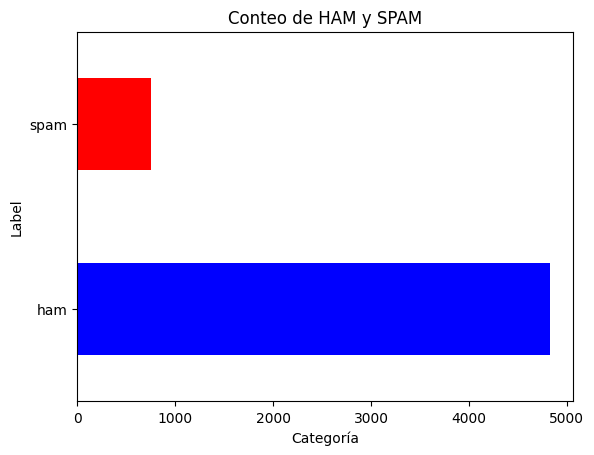

In [15]:

sms['Label'].value_counts().plot(kind='barh', color=['blue', 'red'])
plt.xlabel('Categoría')
plt.title('Conteo de HAM y SPAM')
plt.show()
